In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [2]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)
X_train

array([[[ 0.        ],
        [ 0.00511146],
        [ 0.00618332],
        ..., 
        [ 0.01348295],
        [ 0.01046212],
        [ 0.00495206]],

       [[ 0.        ],
        [ 0.00487661],
        [ 0.01033927],
        ..., 
        [ 0.02469698],
        [ 0.02807824],
        [ 0.02826512]],

       [[ 0.        ],
        [-0.00334011],
        [ 0.00091763],
        ..., 
        [ 0.03020828],
        [ 0.02620747],
        [ 0.03201414]],

       ..., 
       [[ 0.        ],
        [ 0.01034978],
        [ 0.00968519],
        ..., 
        [-0.0398841 ],
        [-0.0428437 ],
        [-0.0286216 ]],

       [[ 0.        ],
        [-0.00182829],
        [-0.0063078 ],
        ..., 
        [-0.03785483],
        [-0.04832574],
        [-0.03883631]],

       [[ 0.        ],
        [ 0.00529216],
        [ 0.01385186],
        ..., 
        [ 0.01418039],
        [ 0.00454622],
        [ 0.00911021]]])

In [3]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print 'compilation time : ', time.time() - start

compilation time :  0.0160129070282


In [4]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 6s 2ms/step - loss: 0.0025 - val_loss: 0.0010


yo


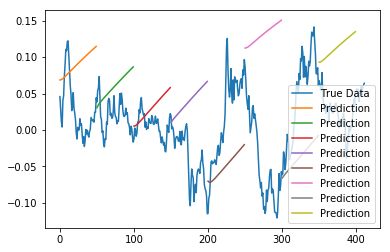

In [5]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)

In [6]:
predictions

[[0.068587311,
  0.068783514,
  0.069220297,
  0.069843486,
  0.070604496,
  0.071463771,
  0.072390325,
  0.073362321,
  0.074363567,
  0.075383045,
  0.07641302,
  0.077448636,
  0.078486435,
  0.079524264,
  0.080560878,
  0.081595302,
  0.082627296,
  0.083656393,
  0.084682353,
  0.085705206,
  0.086724728,
  0.08774104,
  0.088753894,
  0.089763328,
  0.090769388,
  0.09177205,
  0.09277121,
  0.093766883,
  0.094759017,
  0.09574765,
  0.096732728,
  0.09771423,
  0.098692119,
  0.099666372,
  0.100637,
  0.10160392,
  0.10256715,
  0.10352667,
  0.1044824,
  0.10543438,
  0.1063826,
  0.107327,
  0.10826766,
  0.10920456,
  0.11013752,
  0.11106659,
  0.11199179,
  0.1129131,
  0.11383057,
  0.11474413],
 [0.0305559,
  0.032573186,
  0.034322914,
  0.035876494,
  0.037290558,
  0.038607337,
  0.039857686,
  0.041063435,
  0.04223948,
  0.043395795,
  0.044538908,
  0.045673043,
  0.046800878,
  0.047924168,
  0.049043924,
  0.050160617,
  0.051274791,
  0.052386459,
  0.0534954